# MBHB SNR Calculator
A simple notebook to exercise the MBHB waveform code and make a sanity check of SNR

To run this on Google Colab:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ithorpe/GWI-metrics/blob/main/Notebooks/MBHBwaveCheck.ipynb)

In [ ]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import constants
import metrics
import concepts
from PhenomWaveform_nonspinning import getIntrinsic as MBHBwave



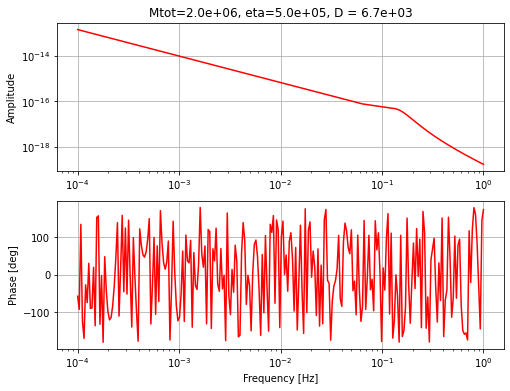

In [49]:
# make the waveform
m1 = 1e6
m2 = 1e6
mtot = (m1+m2)*constants.MSun2s
eta = ((m1*m2)/(m1+m2))*constants.MSun2s
d = 6.7e6*constants.kpc2s   # redshift of ~ 1 = 6700 Mpc = 6.7e6 kpc
f = np.logspace(-4,0,256)
h = MBHBwave(f,mtot,eta,d)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(2,1,1)
ax.plot(f,np.abs(h),'r',label=r'Phenom')
plt.title(r'Mtot=%2.1e, eta=%2.1e, D = %2.1e' % (mtot/constants.MSun2s, eta/constants.MSun2s, (d/constants.kpc2s)/1e3))
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.ylabel('Amplitude')
ax = fig.add_subplot(2,1,2)
plt.plot(f, np.angle(h)*180/np.pi, 'r', label=r'Phenom')
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [deg]')
plt.grid(True)
#plt.show()

In [50]:
# make the model and the sensitivity curve
model=concepts.LISASciRDv1
S_h=metrics.makeSensitivity(f, model)
model

{'label': 'LISA(SciRDv1)',
 'sqSacc_level': 3e-15,
 'sqSoms_level': 1.5e-11,
 'Lconst': 2500000000.0,
 'Dsep': 0,
 'Rorbit': 1.0,
 'Torbit': 1.0,
 'Nindep': 2}

In [52]:
# compute the SNR
snri = np.real(h*np.conjugate(h)/S_h)
snr = np.sqrt(np.sum(np.diff(f)*snri[1:]))
print('SNR = %4.3g' % snr)

SNR = 1.12e+04


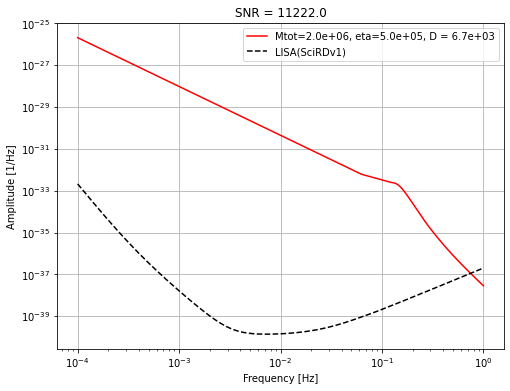

In [54]:
# plot the waveform & sensitivity curve
fig = plt.figure(figsize=(8,6))
ax = plt.plot(f, np.abs(h)**2, 'r-', label=r'Mtot=%2.1e, eta=%2.1e, D = %2.1e' % (mtot/constants.MSun2s, eta/constants.MSun2s, (d/constants.kpc2s)/1e3))
plt.plot(f,S_h,'k--',label='%s' % model.get('label'))
plt.legend()
plt.title('SNR = %2.1f' % snr)
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [1/Hz]')
plt.show()
#fig = plt.figure()
#ax = fig.add_subplot(2,1,2)
#ax.plot(f, np.angle(h), 'k-', label=r'complete')
#plt.xscale("log")
#plt.show()


